In [107]:
import numpy as np
import pandas as pd
import sklearn.preprocessing

In [108]:
data = pd.read_csv("default_plus_chromatic_features_1059_tracks_new.csv",header=None)
data.isnull().sum() #check for missing values in dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
Length: 117, dtype: int64

In [109]:
# Label Encoder used to convert categorical target data to numeric data for getting true labels for adjusted_rand_score
label_encoder=sklearn.preprocessing.LabelEncoder()
data.iloc[:,116]=label_encoder.fit_transform(data.iloc[:,116])

In [110]:
audio_label_data=data.iloc[:,0:116]
audio_label_data_array=audio_label_data.values
#Scaling not done as data is of type audio trac and has same units as it is already processed with mean 0 and variance 1

In [111]:
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt

<h3>Task 1</h3>

In [112]:
ssd=[]
rand_index=[]
K=range(21,43,3)
for k in K:
    model_rand = KMeans(n_clusters=k, init='random',max_iter=200)
    labels=model_rand.fit_predict(audio_label_data_array)
    #print(len(np.unique(labels)))
    randindex=sm.cluster.adjusted_rand_score(data.iloc[:,116],labels)
    centroids=model_rand.cluster_centers_
    ssd.append(model_rand.inertia_)
    rand_index.append(randindex)
    #print(centroids)

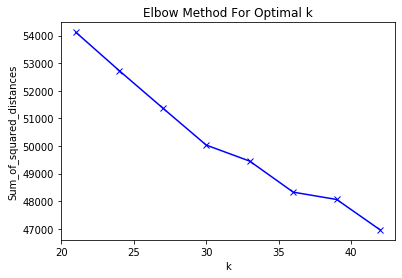

<Figure size 432x288 with 0 Axes>

In [113]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.savefig('SSEvsK.png')

In [120]:
k=21
for i in range(len(ssd)):
    print("k","=",k,"ssd value is",ssd[i])
    k=k+3

k = 21 ssd value is 54122.235650559785
k = 24 ssd value is 52728.939604744955
k = 27 ssd value is 51375.37420744925
k = 30 ssd value is 50033.744372261346
k = 33 ssd value is 49452.89059049289
k = 36 ssd value is 48329.29386225876
k = 39 ssd value is 48063.27923723095
k = 42 ssd value is 46961.146664791835


From the elbow curve we can calculate the optimal value of k in the range of 21 to 42 in steps of 3 which comes out to be 33

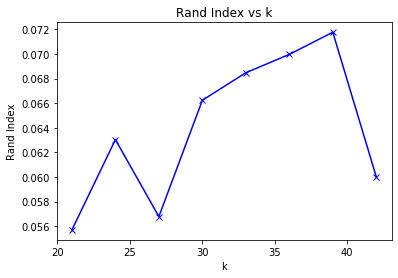

<Figure size 432x288 with 0 Axes>

In [114]:
plt.plot(K, rand_index, 'bx-')
plt.xlabel('k')
plt.ylabel('Rand Index')
plt.title('Rand Index vs k')
plt.show()
plt.savefig('RandIndexvsK.png')

In [121]:
k=21
for i in range(len(rand_index)):
    print("k","=",k,"rand_index value is",rand_index[i])
    k=k+3

k = 21 rand_index value is 0.05569730810355433
k = 24 rand_index value is 0.06304249340247113
k = 27 rand_index value is 0.056782340400405806
k = 30 rand_index value is 0.06624218959318448
k = 33 rand_index value is 0.06848011201584682
k = 36 rand_index value is 0.06997145983180315
k = 39 rand_index value is 0.07177266227576506
k = 42 rand_index value is 0.06001619608776324


<h3>Task 2</h3>

In [115]:
from sklearn.decomposition import PCA

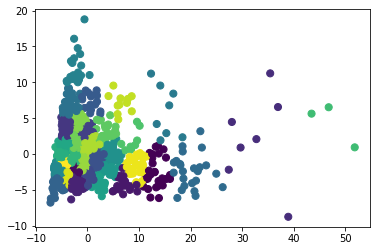

In [116]:
data2d=PCA(n_components=2).fit_transform(audio_label_data_array)
model_rand = KMeans(n_clusters=33, init='random',max_iter=200)
model_rand.fit(data2d)
y_kmean=model_rand.predict(data2d)
plt.scatter(data2d[:, 0], data2d[:, 1], c=y_kmean, s=50, cmap='viridis')
plt.savefig('PCAClusterScatterPlot.png')

In [117]:
rand_pca_index=[]
n_comp=[]
n=2
while n<33:
    n_comp.append(n)
    datareduced=PCA(n_components=n).fit_transform(audio_label_data_array)
    model_rand = KMeans(n_clusters=33, init='random',max_iter=200)
    labels=model_rand.fit_predict(datareduced)
    randindex=sm.cluster.adjusted_rand_score(data.iloc[:,116],labels)
    rand_pca_index.append(randindex)
    n=n*2

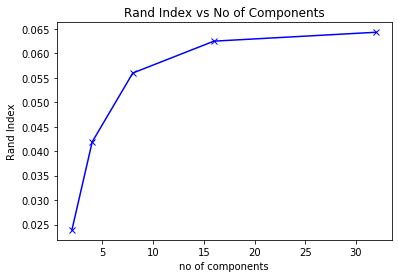

<Figure size 432x288 with 0 Axes>

In [119]:
plt.plot(n_comp, rand_pca_index, 'bx-')
plt.xlabel('no of components')
plt.ylabel('Rand Index')
plt.title('Rand Index vs No of Components')
plt.show()
plt.savefig('PCARandIndexvsK.png')

In [122]:
ncomp=2
for i in range(len(rand_pca_index)):
    print("No of Components","=",ncomp,"ssd value is",rand_pca_index[i])
    ncomp=ncomp*2

No of Components = 2 ssd value is 0.023896393688517988
No of Components = 4 ssd value is 0.04191059635677282
No of Components = 8 ssd value is 0.055996705690040595
No of Components = 16 ssd value is 0.06252004475915843
No of Components = 32 ssd value is 0.06434305344523152
